In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
train=pd.read_csv('SalaryData_Train(1).csv')
test=pd.read_csv('SalaryData_Test(1).csv')

# `EDA`

In [4]:
train.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


# `Checking for duplicates and removing them`

In [6]:
train[train.duplicated()]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
326,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
364,27,Private,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,50,United-States,<=50K
518,24,Private,HS-grad,9,Never-married,Handlers-cleaners,Unmarried,Black,Female,0,0,40,United-States,<=50K
525,24,Private,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
619,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30110,47,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
30118,20,Private,HS-grad,9,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,40,United-States,<=50K
30132,22,Private,Some-college,10,Never-married,Adm-clerical,Own-child,White,Male,0,0,40,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K


In [7]:
train.drop_duplicates(inplace=True)

In [8]:
train.reset_index(inplace=True)

In [9]:
test[test.duplicated()]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
551,59,Private,HS-grad,9,Divorced,Other-service,Not-in-family,White,Female,0,0,40,United-States,<=50K
601,32,Private,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,<=50K
681,40,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
799,24,Private,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,35,United-States,<=50K
1044,44,Private,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,60,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15043,51,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
15044,22,Private,Some-college,10,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
15049,32,Private,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,40,United-States,<=50K
15052,31,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K


In [10]:
test.drop_duplicates(inplace=True)

In [11]:
test.reset_index(inplace=True)

# `Label Encoding`

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
le=LabelEncoder()

In [14]:
train['workclass']= le.fit_transform(train['workclass']) 
train['education']= le.fit_transform(train['education'])
train['maritalstatus']= le.fit_transform(train['maritalstatus'])
train['occupation']= le.fit_transform(train['occupation'])
train['relationship']= le.fit_transform(train['relationship'])
train['race']= le.fit_transform(train['race'])
train['sex']= le.fit_transform(train['sex'])
train['native']= le.fit_transform(train['native'])
train['Salary']= le.fit_transform(train['Salary'])

In [15]:
test['workclass']= le.fit_transform(test['workclass']) 
test['education']= le.fit_transform(test['education'])
test['maritalstatus']= le.fit_transform(test['maritalstatus'])
test['occupation']= le.fit_transform(test['occupation'])
test['relationship']= le.fit_transform(test['relationship'])
test['race']= le.fit_transform(test['race'])
test['sex']= le.fit_transform(test['sex'])
test['native']= le.fit_transform(test['native'])
test['Salary']= le.fit_transform(test['Salary'])

# `Visualizations`

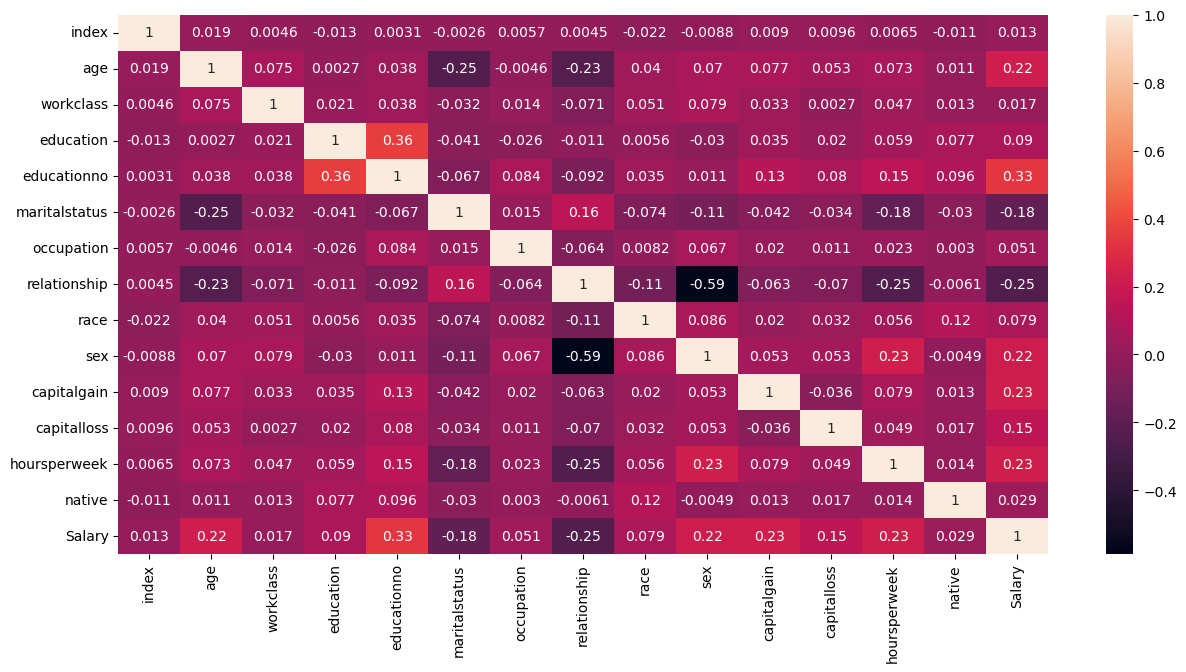

In [16]:
plt.figure(figsize=(15,7))
sns.heatmap(train.corr(),annot=True)
plt.show()

# `Insights`
The heatmap does not reveal any clear relationship among age, education, capitalgain, capitalloss and Hoursperweek.

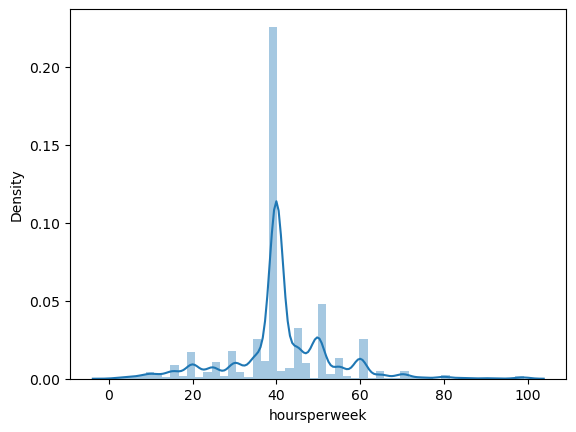

In [18]:
sns.distplot(train['hoursperweek']);

# `Insights`
hoursperweek data is almost normally distributed now lets check for outliers

<Axes: xlabel='hoursperweek'>

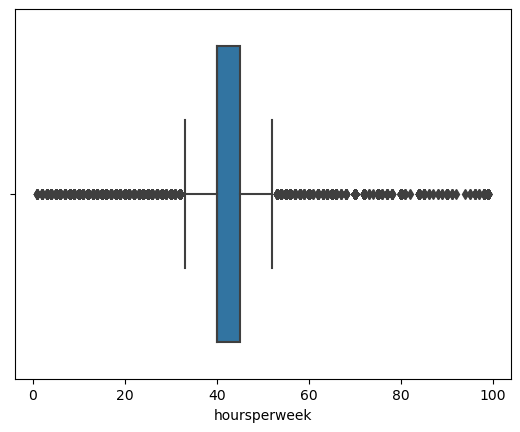

In [27]:
sns.boxplot(x='hoursperweek',data=train)

# `Insights`
There are lot of outliers present in the dataframe but we can't drop them because they are present in a very large quantity and can be important for model building

# `Splitting the Data`

In [20]:
x_train = train.iloc[:,0:13]
y_train = train.iloc[:,-1]   

In [21]:
x_test = test.iloc[:,0:13]
y_test = test.iloc[:,-1]

# `SVM`

In [22]:
from sklearn.svm import SVC

In [23]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [24]:
from sklearn.model_selection import GridSearchCV

In [ ]:
model_rbf = SVC(kernel = 'rbf')
model_rbf.fit(x_train,y_train)
pred_test_rbf = model_rbf.predict(x_test)
print("Accuracy:", accuracy_score(y_test, pred_test_rbf))(y_test, y_pred) 

In [ ]:
confusion_matrix(y_test, pred_test_rbf)

In [ ]:
class2 = SVC()
param_grid2 = [{'kernel':['rbf'], 'gamma': [50,5,0.5], 'C':[15,12,7,3,0.1,0.0001]}]
gscv2 = GridSearchCV(class2,param_grid2,cv=10)
gscv2.fit(x_train, y_train)

In [ ]:
gscv2.best_params_, gscv2.best_score_

In [ ]:
c2 = SVC(C=15, gamma = 0.5)
c2.fit(x_train, y_train)
y_pred2 = c2.predict(x_test) 
acc2 = accuracy_score(y_test, y_pred2)*100
print("Accuracy:", acc2)